# TSys class

Represents a transition system [Principles of Model Checking, Def. 2.1].
$$
    TSys = (S, A, T, AP, L)
$$
In the `TSys` class, each component is represented as a function.

- The set of states $S$ is represented by `TSys.states` function,
- The set of actions $A$ is represented by `TSys.actions` function,
- The transition function $T$ is represented by `TSys.delta` function,
- The set of atomic propositions is represented by `TSys.atoms` function,
- The labeling function $L$ is represented by `TSys.label` function.

All of the above functions are marked abstract. The recommended way to use `TSys` class is by subclassing it and implementing its component functions.

A transition system can be either deterministic or non-deterministic or probabilistic. To define a **deterministic** transition system, provide a keyword argument `is_deterministic=True` to the constructor. To define a **nondeterministic** transition system, provide a keyword argument `is_deterministic=False` to the constructor. To define a **probabilistic** transition system, provide a keyword arguments `is_deterministic=False, is_probabilistic=True` to the constructor.

The design of `TSys` class closely follows its mathematical definition. Hence, the signatures of `delta` function for deterministic, nondeterministic, probabilistic  transition systems are different.

- **deterministic:**  `delta(state, act) -> single state`
- **non-deterministic:**  `delta(state, act) -> a list of states`
- **probabilistic:**  `delta(state, act) -> a distribution over states`

An important feature of `TSys` class is the `graphify()` function. It constructs a `Graph` object that is equivalent to the transition system. The nodes of the `Graph` represent the states of `TSys`, the edges of the `Graph` are defined by the set of `actions` and the `delta` function. The atomic propositions, labeling function are stored as `node, edge` and `graph` properties. By default, every `Graph` returned a `TSys.graphify()` function have the following (node/edge/graph) properties:

- `state`: (node property) A Map from every node to the state of transition system it represents.
- `actions`: (graph property) List of valid actions.
- `input`: (edge property) A map from every edge `(uid, vid, key)` to its associated action label.
- `prob`: (edge property) The probability associated with the edge `(uid, vid, key)`.
- `atoms`: (graph property) List of valid atomic propositions.
- `label`: (node property) A map every node to the list of atomic propositions true in the state represented by that node.
- `init_state`: (graph property) Initial state of transition system.
- `is_deterministic`: (graph property) Is the transition system deterministic?
- `is_probabilistic`: (graph property) Is the transition system probabilistic?

**Note:** Some features of probabilistic transition system are not tested. If you are trying to implement a probabilistic transition system, reach out to Abhishek Kulkarni (a.kulkarni2@ufl.edu).


Next, we demonstrate how to use `TSys` class to define a deterministic, non-deterministic and probabilistic transition system.



In [ ]:
# This code block is necessary when running in `ggsolver:v0.1` docker image.
import sys
sys.path.append('/home/ggsolver/')

# This part is for saving images while exporting to HTML
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Image
from IPython.core.display import HTML

## Deterministic transition system.
Consider the transition system as shown in the figure below. To implement this *deterministic* transition system,
- First, define a class that inherits from `ggsolver.models.TSys` class.
- Then, implement the component functions: `states, actions, delta, atoms, label` to define the transition system.


In [ ]:
image = PILImage.open("jobstmann.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [ ]:
from ggsolver.models import TSys

class Jobstmann(TSys):
    def states(self):
        """
        The set of states is {0, ..., 7}.
        """
        return list(range(8))

    def actions(self):
        """
        Since the given TSys does not have action labels, we define the actions to be a tuple of source and target states.
        This choice of actions will help is simplify delta function.
        """
        return [(0, 1), (0, 3), (1, 0), (1, 2), (1, 4), (2, 4), (2, 2), (3, 0), (3, 4), (3, 5), (4, 3), (5, 3), (5, 6),
                (6, 6), (6, 7), (7, 0), (7, 3)]

    def delta(self, state, act):
        """
        Since each edge encodes the source and target state, the transition function has a straightforward implementation.
        """
        if state == act[0]:
            return act[1]
        return None

    def atoms(self):
        """
        The only property we care about is whether a state is final state or not. Hence, define "final" as the only
        atomic proposition.
        """
        return ["final"]

    def label(self, state):
        """
        The atomic proposition "final" holds only in states 3 and 4. For all other states, no atomic propositions are true.
        """
        if state in [3, 4]:
            return ["final"]
        return []

Once a transition system is defined, we can create its instance.
The instance can be graphified: that is, the underlying graph of the transition system can be constructed as follows.

In [ ]:
tsys = Jobstmann()
graph = tsys.graphify()

The above code issues several warnings to point out that the transition function is not complete.
That is, the call to `delta(state, inp)` did not return a valid state.

If this is expected (as will in our case), then the warnings can be ignored. Otherwise, the delta function can be modified to fix the warnings.

The generated graph can be serialized to a dictionary or saved to file as described in
 [https://akulkarni.me/ggsolver/modules/models.html#ggsolver.models.TSys.serialize](https://akulkarni.me/ggsolver/modules/models.html#ggsolver.models.TSys.serialize).


In [ ]:
graph.serialize()

As you may note the `init_state` property of the graph is `None`. The initial state of the transition system can be set using `initialize()` method. The current initial state of the transition system is returned by `init_state()` method.

**Note:** The initialize method does NOT check for the validity of the input state. However, it is expected that the state is contained in the list returned by `tsys.states()`.

In [ ]:
tsys.initialize(0)
print("init_state:", tsys.init_state())

**Note:** If any changes are made to the transition system after a call to graphify, the changes will not reflect in the graph. The `graphify` must be called again.

## Non-deterministic transition system.
Consider the (simplified!) spring transition system shown in the figure below. To implement this *non-deterministic* transition system,
- First, define a class that inherits from `ggsolver.models.TSys` class.
- Then, define the constructor that includes a call to base class constructor with parameter `deterministic = False`.
- Then, implement the component functions: `states, actions, delta, atoms, label` to define the transition system.


In [ ]:
image = PILImage.open("spring.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

## Non-deterministic transition system.
Consider the (simplified!) spring transition system shown in the figure below. To implement this *non-deterministic* transition system,
- First, define a class that inherits from `ggsolver.models.TSys` class.
- Then, define the constructor that includes a call to base class constructor with parameter `deterministic = False`.
- Then, implement the component functions: `states, actions, delta, atoms, label` to define the transition system.



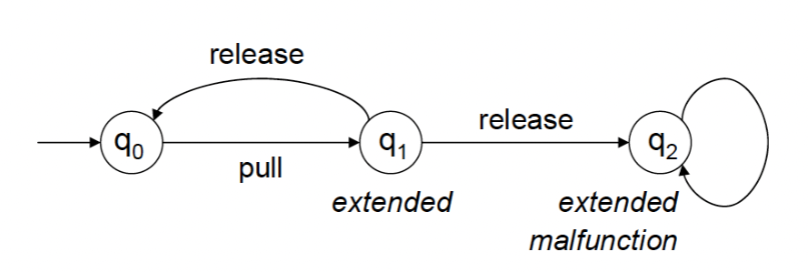

In [7]:
image = PILImage.open("spring.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [8]:
class SpringTS(TSys):
    def __init__(self):
        super(SpringTS, self).__init__(is_deterministic=False)

    def states(self):
        return ["q0", "q1", "q2"]

    def actions(self):
        return ["pull", "release"]

    def delta(self, state, act):
        """
        A non-deterministic transition function should return a list or tuple of next_states.
        """
        if state == "q0" and act == "pull":
            return ["q1"]
        elif state == "q1" and act == "release":
            return ["q0", "q2"]
        elif state == "q2":
            return ["q2"]

    def atoms(self):
        return ["extended", "malfunction"]

    def label(self, state):
        """
        The atomic proposition "final" holds only in states 3 and 4. For all other states, no atomic propositions are true.
        """
        if state == "q0":
            return []
        elif state == "q1":
            return ["extended"]
        else:
            return ["extended", "malfunction"]

<div class="alert alert-block alert-warning">
<b>Note:</b> The `delta` function must return a list/tuple of next states, even if the next state is unique.
</div>

We can check whether a transition system is deterministic, non-deterministic, or probabilistic.

In [9]:
tsys = SpringTS()
print("is_deterministic:", tsys.is_deterministic())
print("is_nondeterministic:", tsys.is_nondeterministic())
print("is_probabilistic:", tsys.is_probabilistic())

is_deterministic: False
is_nondeterministic: True
is_probabilistic: False


## Probabilistic transition system

Consider an MDP from Principles of Model Checking, Fig. 10.21. To implement this *probabilistic* transition system,
- First, define a class that inherits from `ggsolver.models.TSys` class.
- Then, define the constructor that includes a call to base class constructor with parameter `deterministic = False, probabilistic = True`.
- Then, implement the component functions: `states, actions, delta, atoms, label` to define the transition system.

<div class="alert alert-block alert-danger">
<b>Note:</b> The implementation of probabilistic transition system is under development. The example will be updated once the API is finalized.
</div>

In [10]:
from ggsolver.util import Distribution

class MDP(TSys):
    def __init__(self):
        super(MDP, self).__init__(is_deterministic=False, is_probabilistic=True)

    def states(self):
        return list(range(8))

    def actions(self):
        """ We use a, b instead of alpha, beta. """
        return ["a", "b"]

    def delta(self, state, act):
        """
        A probabilistic transition function should return a distribution of next_states.
        """
        if state == 0 and act == "a":
            return Distribution(domain=[1], prob=[1])
        elif state == 0 and act == "b":
            return Distribution(domain=[2, 4], prob=[1./3, 2./3])
        else:
            # and so on...
            pass

    # definition of atoms, label function is similar to deterministic and non-deterministic transition system.

To visualize an MDP, we can first graphify it and then use the `state` node-property and `action, prob` edge-properties.

In [11]:
tsys = MDP()
graph = tsys.graphify()
graph.to_png("mdp.png", nlabel=["state"], elabel=["action", "prob"])

 [SUCCESS] <Graph with |V|=8, |E|=0> generated. 
